In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

dietary = pd.read_csv('dietary_code.csv')
# dietary = dietary.dropna(how='any')
dietary.describe()

,Total saturated fatty acids,Total monounsaturated fatty acids,Total polyunsaturated fatty acids,Energy,Protein,Carbohydrate,Sugars,Dietary Fiber,Total Fat,food type
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000
mean,1.782047,1.662838,1.306829,111.860331,3.611229,12.829350,5.752405,0.814793,5.205953,4.91405
std,3.519779,3.313627,3.558444,156.113141,7.835908,20.016995,11.332683,1.667280,9.492915,3.94154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.007000,0.006000,0.011000,13.000000,0.130000,0.750000,0.150000,0.000000,0.060000,1.00000
50%,0.383000,0.358500,0.150000,59.000000,0.920000,4.490000,1.500000,0.100000,1.550000,3.00000
75%,1.985750,1.864000,0.976000,151.000000,4.150000,16.465000,5.810000,1.000000,6.525000,8.00000
max,59.187000,40.483000,94.371000,2752.000000,162.510000,281.000000,210.640000,26.400000,181.360000,14.00000


Total saturated fatty acids
KNN Mean Squared Error: 2.028238006280992
Random Forest Mean Squared Error: 1.0764185427723543


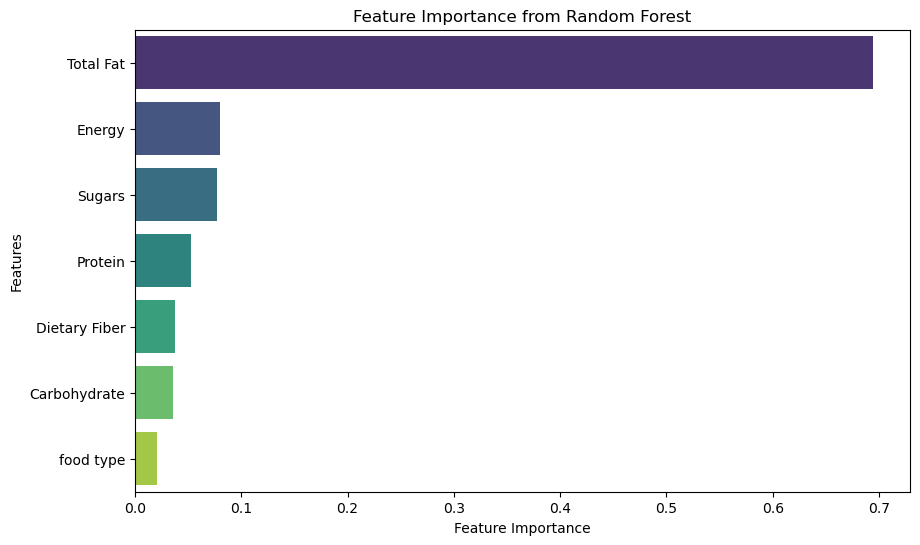

SVM Mean Squared Error: 3.637864536076884
Total monounsaturated fatty acids
KNN Mean Squared Error: 1.8124619685950416
Random Forest Mean Squared Error: 1.5607082387439986


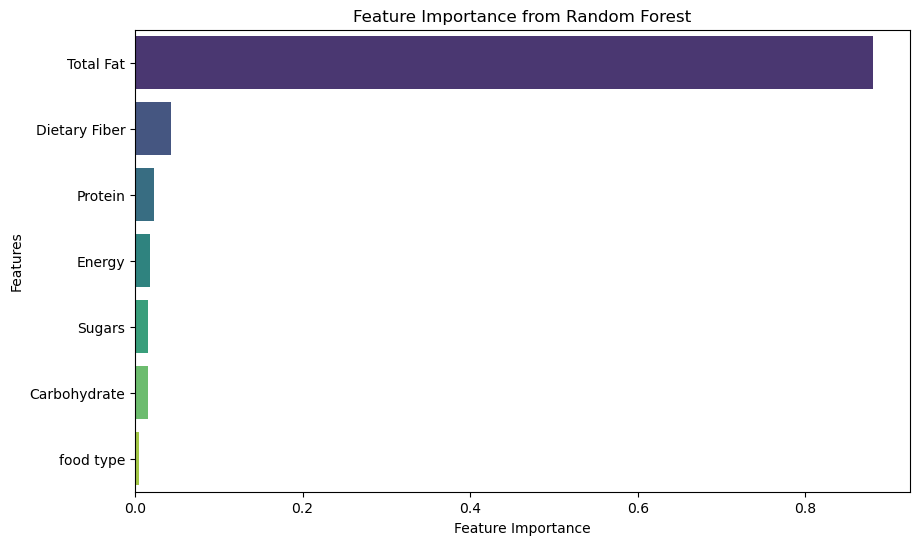

SVM Mean Squared Error: 1.8451295087690267
Total polyunsaturated fatty acids
KNN Mean Squared Error: 1.9582388620385676
Random Forest Mean Squared Error: 0.5392740197813916


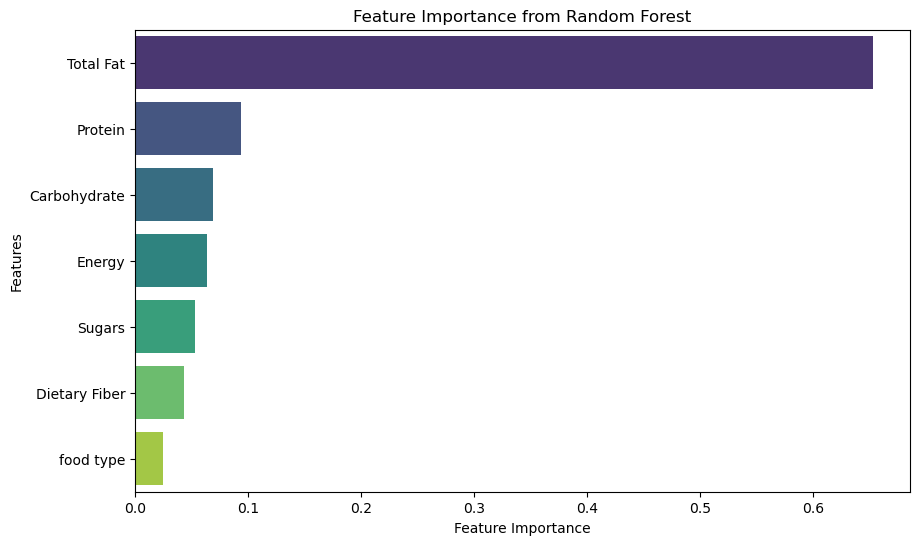

SVM Mean Squared Error: 3.4968586991119355


In [25]:
X = dietary.drop(columns=dietary.columns[0:3])

for i in range(3):
    print(dietary.columns[i])
    y = dietary[dietary.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # KNN
    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"KNN Mean Squared Error: {mse}")

    # Random Forest
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Random Forest Mean Squared Error: {mse}")
    
    feature_importance = rf_regressor.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx], palette="viridis")
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance from Random Forest')
    plt.show()

    # SVM
    svr_model = SVR() 
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"SVM Mean Squared Error: {mse}")

Random Forest has the smallest error for all three predictions

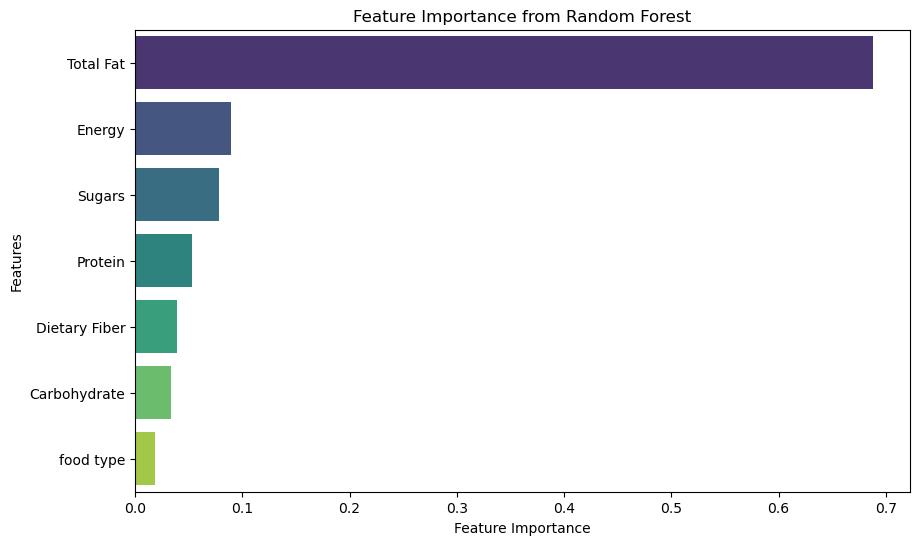

In [24]:
X = dietary.drop(columns=dietary.columns[0:3])
y = dietary[dietary.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

feature_importance = rf_regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx], palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

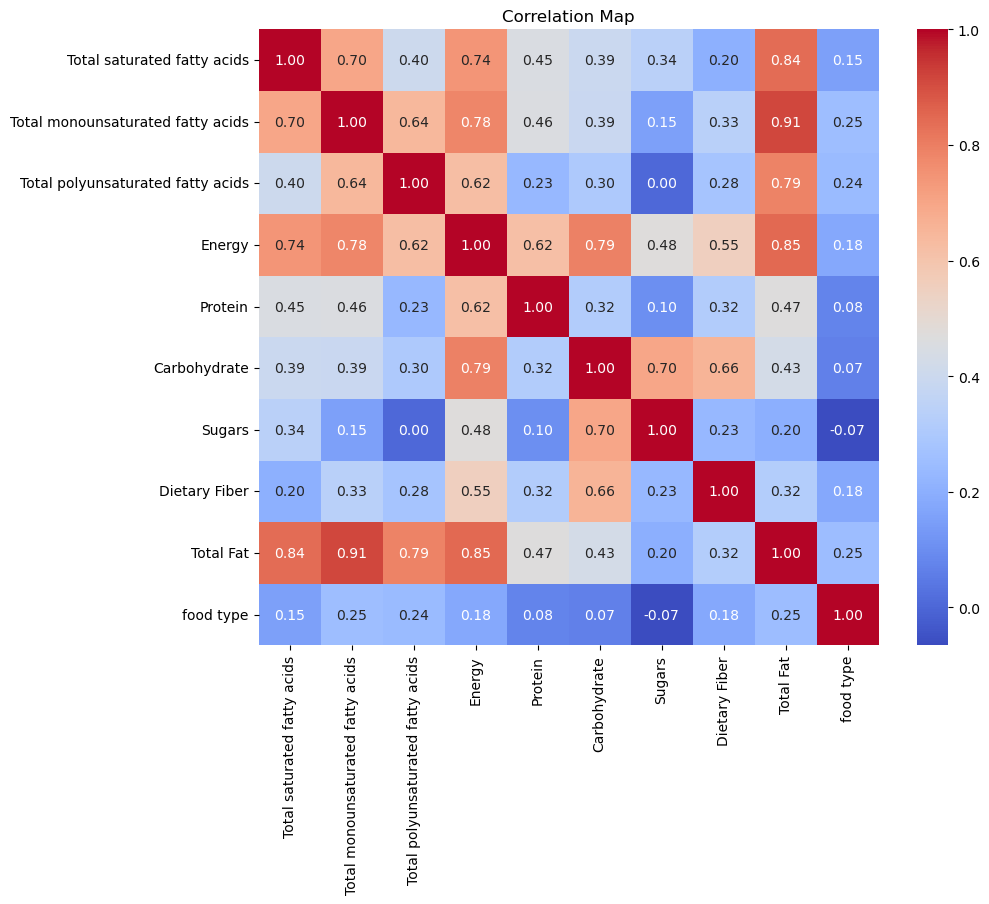

In [27]:
corr_matrix = dietary.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map")
plt.show()


# scrach

In [3]:
X = dietary.drop(columns=dietary.columns[0:3])

y = dietary[dietary.columns[0]]

# total_sum = X['Total Fat'] + X['Carbohydrate'] + X['Protein']  
# pfat = X['Total Fat'] / total_sum 
# pcar = X['Carbohydrate'] / total_sum 
# ppro = X['Protein'] / total_sum  
# X['Total Fat %'] = pfat 
# X['Carbohydrate %'] = pcar 
# X['Protein %'] = ppro
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.71808541707989


# Tree (Random forest)

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.9334200971139268


# SVM

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

svr_model = SVR() 
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.179454919733392


In [ ]:
# give up tuning
# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Define a range of hyperparameters for tuning, including different kernels
param_grid = [
#    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
#     {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'epsilon': [0.01, 0.1, 0.5]},
#     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'epsilon': [0.01, 0.1, 0.5]}
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
]

# Initialize the SVR model
svr = SVR()

# Setup GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train_scaled)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (neg MSE):", grid_search.best_score_)

# Retrieve the best model
best_svr_model = grid_search.best_estimator_

# # Optionally, evaluate the best model on the test set
# y_pred_scaled = best_svr_model.predict(X_test_scaled)
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# # Calculate some evaluation metric, e.g., MSE
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test Set Mean Squared Error: {mse}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


# 